# Notebook resumen
Para este proyecto de Machine Learning, hemos elegido un set de datos de Kaggle que contiene un ranking de los 100 repositorios de Python mas populares desde diciembre de 2018 hasta el inicio del trabajo en febrero de 2024. El objetivo es crear un modelo que prediga el n칰mero de forks que se realizan sobre un repostorio.

## Librerias

In [1]:
# Manejo de datos
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

# Visualizaci칩n
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
from matplotlib.ticker import FixedLocator, FixedFormatter

import seaborn as sns

# Preporcesado
from sklearn.preprocessing import LabelEncoder, RobustScaler

# Clusterinzaci칩n
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

# Baselines y optimizaci칩n
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Modelos
from sklearn.linear_model import ElasticNet, Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, HistGradientBoostingRegressor, VotingRegressor

# Metricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

# nlp
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Warnigs
import warnings
warnings.filterwarnings("ignore")

## Carga de datos

In [2]:
df = pd.read_csv("..\data\\raw\popular_python_projects.csv")

## 칈ndice

1. EDA

2. Limpieza

3. Feature engeneering

4. Transformaciones y escalado

5. Clusterizaci칩n

6. Modelo cluster 0

7. Modelo cluster 1

8. Modelo cluster 2
 
9. Modelo cluster 3

10. Modelo cluster 0

## 1. EDA

### Primera exploraci칩n

In [3]:
df.head()

date  rank    item             repo_name  stars  forks language  \
0  2018-12-18     1  Python        awesome-python  58777  11448   Python   
1  2018-12-18     2  Python  system-design-primer  53575   7570   Python   
2  2018-12-18     3  Python                models  46039  28053   Python   
3  2018-12-18     4  Python           public-apis  45373   4707   Python   
4  2018-12-18     5  Python            youtube-dl  44956   7820   Python   

                                            repo_url     username  issues  \
0            https://github.com/vinta/awesome-python        vinta     439   
1  https://github.com/donnemartin/system-design-p...  donnemartin      68   
2               https://github.com/tensorflow/models   tensorflow    1324   
3           https://github.com/toddmotto/public-apis    toddmotto       5   
4                  https://github.com/rg3/youtube-dl          rg3    2566   

            last_commit                                        description  
0  2018-12-13T08:29:32Z  A curated list of awesome Python frameworks, l...  
1  2018-12-18T11:20:56Z  Learn how to design large-scale systems. Prep ...  
2  2018-12-18T02:29:33Z          Models and examples built with TensorFlow  
3  2018-12-18T11:24:53Z  A collective list of free APIs for use in soft...  
4  2018-12-18T11:18:21Z  Command-line program to download videos from Y...

In [4]:
df.tail()

date  rank    item               repo_name  stars  forks  \
170275  2024-02-03    96  Python               diffusers  20767   4297   
170276  2024-02-03    97  Python  Awesome-Linux-Software  20672   2005   
170277  2024-02-03    98  Python             insightface  20230   5040   
170278  2024-02-03    99  Python                   Gooey  20130   1091   
170279  2024-02-03   100  Python            DeepFaceLive  20093   3172   

       language                                           repo_url  \
170275   Python           https://github.com/huggingface/diffusers   
170276   Python  https://github.com/luong-komorebi/Awesome-Linu...   
170277   Python         https://github.com/deepinsight/insightface   
170278   Python                https://github.com/chriskiehl/Gooey   
170279   Python             https://github.com/iperov/DeepFaceLive   

              username  issues           last_commit  \
170275     huggingface     289  2024-02-03T02:59:18Z   
170276  luong-komorebi       8  2024-01-27T10:02:38Z   
170277     deepinsight    1011  2023-12-24T05:29:03Z   
170278      chriskiehl     126  2024-01-29T12:27:25Z   
170279          iperov       1  2023-07-28T10:14:16Z   

                                              description  
170275  游뱅 Diffusers: State-of-the-art diffusion models...  
170276               游냖 A list of awesome Linux softwares   
170277   State-of-the-art 2D and 3D Face Analysis Project  
170278  Turn (almost) any Python command line program ...  
170279  Real-time face swap for PC streaming or video ...

In [5]:
df.shape

(170280, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170280 entries, 0 to 170279
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   date         170280 non-null  object
 1   rank         170280 non-null  int64 
 2   item         170280 non-null  object
 3   repo_name    170280 non-null  object
 4   stars        170280 non-null  int64 
 5   forks        170280 non-null  int64 
 6   language     170280 non-null  object
 7   repo_url     170280 non-null  object
 8   username     170280 non-null  object
 9   issues       170280 non-null  int64 
 10  last_commit  170280 non-null  object
 11  description  168687 non-null  object
dtypes: int64(4), object(8)
memory usage: 15.6+ MB


Si el ranking es el top 100, eso quiere decir que siempre que se actualiza la base de datos se a침ade una entrada por puesto.

In [7]:
df["rank"].value_counts()

rank
1      1722
32     1722
34     1722
35     1722
36     1722
       ... 
75     1674
76     1674
77     1674
78     1674
100    1674
Name: count, Length: 100, dtype: int64

In [8]:
#comprobamos que el ranking tiene distintos repositorios
df[df["rank"] == 1] 

date  rank    item       repo_name   stars  forks language  \
0       2018-12-18     1  Python  awesome-python   58777  11448   Python   
100     2018-12-19     1  Python  awesome-python   58801  11454   Python   
200     2018-12-20     1  Python  awesome-python   58840  11455   Python   
300     2018-12-21     1  Python  awesome-python   58882  11465   Python   
400     2018-12-22     1  Python  awesome-python   58936  11470   Python   
...            ...   ...     ...             ...     ...    ...      ...   
169780  2024-01-30     1  Python     public-apis  277535  31168   Python   
169880  2024-01-31     1  Python     public-apis  277656  31177   Python   
169980  2024-02-01     1  Python     public-apis  277800  31191   Python   
170080  2024-02-02     1  Python     public-apis  277965  31207   Python   
170180  2024-02-03     1  Python     public-apis  278085  31228   Python   

                                          repo_url     username  issues  \
0          https://github.com/vinta/awesome-python        vinta     439   
100        https://github.com/vinta/awesome-python        vinta     439   
200        https://github.com/vinta/awesome-python        vinta     439   
300        https://github.com/vinta/awesome-python        vinta     440   
400        https://github.com/vinta/awesome-python        vinta     439   
...                                            ...          ...     ...   
169780  https://github.com/public-apis/public-apis  public-apis       4   
169880  https://github.com/public-apis/public-apis  public-apis       2   
169980  https://github.com/public-apis/public-apis  public-apis       2   
170080  https://github.com/public-apis/public-apis  public-apis       2   
170180  https://github.com/public-apis/public-apis  public-apis       2   

                 last_commit  \
0       2018-12-13T08:29:32Z   
100     2018-12-13T08:29:32Z   
200     2018-12-20T06:49:58Z   
300     2018-12-20T12:52:04Z   
400     2018-12-20T12:52:04Z   
...                      ...   
169780  2024-01-28T01:47:43Z   
169880  2024-01-28T01:47:43Z   
169980  2024-01-31T06:04:35Z   
170080  2024-02-01T09:06:25Z   
170180  2024-02-01T09:06:25Z   

                                              description  
0       A curated list of awesome Python frameworks, l...  
100     A curated list of awesome Python frameworks, l...  
200     A curated list of awesome Python frameworks, l...  
300     A curated list of awesome Python frameworks, l...  
400     A curated list of awesome Python frameworks, l...  
...                                                   ...  
169780                     A collective list of free APIs  
169880                     A collective list of free APIs  
169980                     A collective list of free APIs  
170080                     A collective list of free APIs  
170180                     A collective list of free APIs  

[1722 rows x 12 columns]

In [9]:
df["language"].value_counts()

language
Python    170280
Name: count, dtype: int64

In [10]:
df["item"].value_counts()

item
Python    170280
Name: count, dtype: int64

In [11]:
# cantindad de nulos
df.isna().sum()/len(df)

date           0.000000
rank           0.000000
item           0.000000
repo_name      0.000000
stars          0.000000
forks          0.000000
language       0.000000
repo_url       0.000000
username       0.000000
issues         0.000000
last_commit    0.000000
description    0.009355
dtype: float64

In [12]:
# un repositorio se puede repetir?
df["repo_name"].value_counts()

repo_name
Python                         2343
algo                           1799
big-list-of-naughty-strings    1247
glances                        1246
ansible                        1242
                               ... 
paraphraser                       1
keras-squeezenet                  1
One-Shot-Object-Detection         1
face.evoLVe                       1
sae-python-dev-guide              1
Name: count, Length: 4247, dtype: int64

In [13]:
df.describe()

rank          stars          forks         issues
count  170280.000000  170280.000000  170280.000000  170280.000000
mean       50.161734   24222.825476    5317.970302     428.204205
std        28.825082   22172.348577    6466.364554     953.338588
min         1.000000     207.000000       0.000000       0.000000
25%        25.000000   13090.000000    1658.000000      32.000000
50%        50.000000   18139.000000    3260.000000     136.000000
75%        75.000000   28049.250000    6252.000000     381.000000
max       100.000000  278085.000000   51066.000000   16431.000000

Tras una primera exploraci칩n estas son las principales caracter칤sticas del set de datos:
- Cada semana se actualiza el ranking de ranking 100 de los repositiorios.
- Existen repositorios con distintas entradas, pues si cuando se actualiz칩 el set de datos se manten칤a en el top 100 se a침ade tambi칠n, pero se actualiza su ranking, forks e issues.
- Las variables item y lenguaje no aportan informaci칩n porque ambas indican que el el repositorio es en lenguaje python.
- El dataframe apenas tiene valores nulos (solo hay en la variable *description* y no llega al 1%) y no tiene duplicados.

### Cardinalidad

In [14]:
def cardinalidad(df):

    columnas = df.columns

    unicos = df.nunique()

    card_100 = [(df[i].nunique()/len(df))*100 for i in df]

    tipo_dato = []
    
    for x in df.columns:
        if df[x].dtypes == '<M8[ns]':
            y = "datetime"
            tipo_dato.append(y)
        elif df[x].nunique() == 2:
            y = "boolean"
            tipo_dato.append(y)
        elif df[x].nunique() != 2 and df[x].dtype == "O":
            y = "categorical"
            tipo_dato.append(y)
        elif df[x].nunique() != 2 and df[x].dtype == "float64":
            y = "numerical"
            tipo_dato.append(y)
        elif df[x].nunique() != 2 and df[x].dtype == "int64":
            y = "numerical"
            tipo_dato.append(y)

    cardinality = pd.DataFrame({"Columna":columnas, "Total de 칰nicos":unicos, 
                                "Cardinalidad (%)":card_100, "Tipo de dato": tipo_dato}).set_index("Columna")
    
    return cardinality

In [15]:
df_cardinalidad = cardinalidad(df).sort_values(by="Total de 칰nicos", ascending=False)
df_cardinalidad

Total de 칰nicos  Cardinalidad (%) Tipo de dato
Columna                                                    
last_commit            74700         43.868922  categorical
stars                  52175         30.640709    numerical
forks                  22522         13.226451    numerical
issues                  4874          2.862344    numerical
description             4573          2.685577  categorical
repo_url                4364          2.562838  categorical
repo_name               4247          2.494127  categorical
username                3493          2.051327  categorical
date                    1722          1.011276  categorical
rank                     100          0.058727    numerical
item                       1          0.000587  categorical
language                   1          0.000587  categorical

Las variables *last_commit* y *date* tienen el *type* mal aplicado, procedemos a pasarlos a formato ``datetime`` para poder trabajar correctamente con estas variables.

In [16]:
df["last_commit"] = pd.to_datetime(df["last_commit"])
df["date"] = pd.to_datetime(df["date"])

### An치lisis univariante

Tras la primera exploraci칩n y el estudio de la cardinaldidad conclu칤mos que las columnas *repo_url*, *item* y *language* puesto que no aportan informaci칩n relevante.

In [17]:
df.drop(columns=["repo_url", "item", "language"], inplace= True)

array([[<Axes: title={'center': 'stars'}>,
        <Axes: title={'center': 'forks'}>],
       [<Axes: title={'center': 'issues'}>,
        <Axes: title={'center': 'rank'}>]], dtype=object)

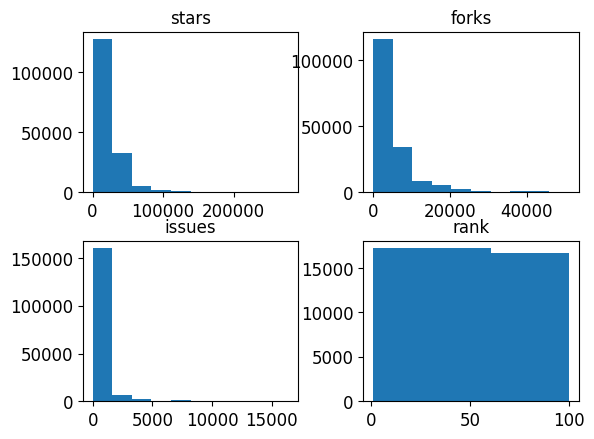

In [18]:
#distribuci칩n de las columnas n칰mericas
numerical_col = list(df_cardinalidad["Tipo de dato"][df_cardinalidad["Tipo de dato"] == "numerical"].index)
df[numerical_col].hist(grid=False)

array([[<Axes: title={'center': 'last_commit'}>,
        <Axes: title={'center': 'date'}>]], dtype=object)

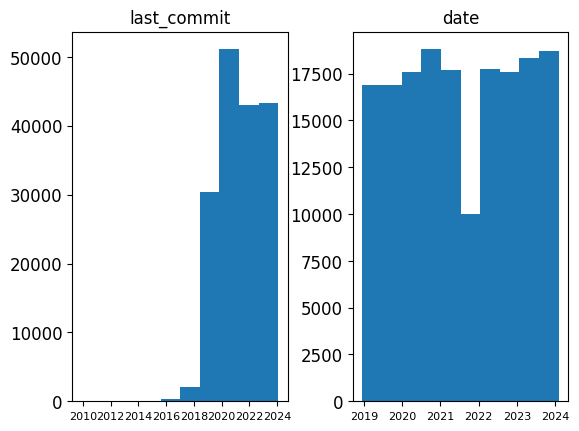

In [19]:
# distribuci칩n de las columnas datetime
df[["last_commit", "date"]].hist(grid=False, xlabelsize=(8))

([], [])

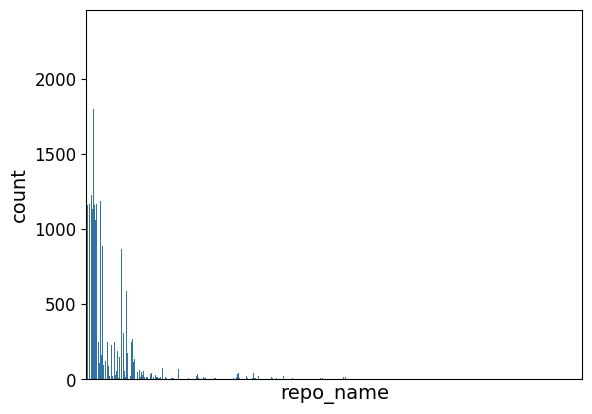

In [20]:
# distribuci칩n repo_name
sns.countplot(df, x = "repo_name")
plt.xticks([])

([], [])

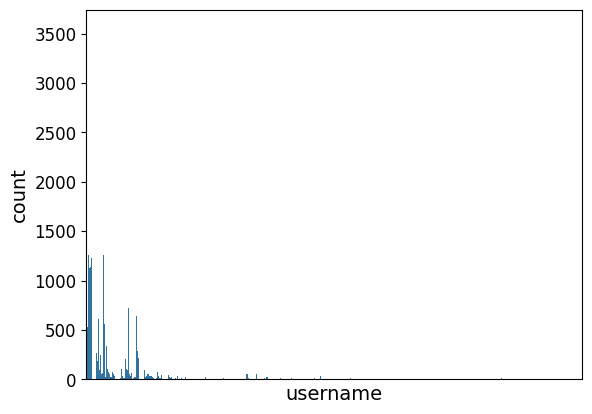

In [21]:
# distribuci칩n username
sns.countplot(df, x = "username")
plt.xticks([])

([], [])

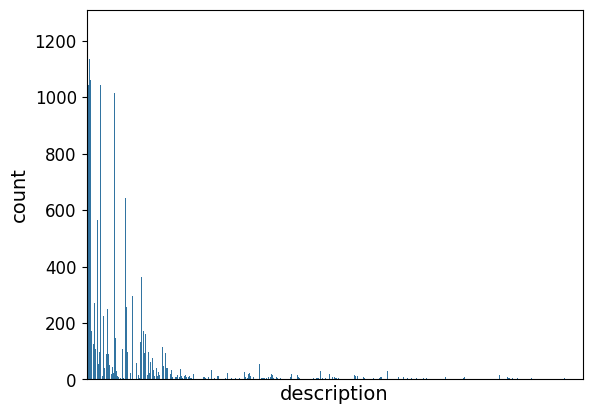

In [22]:
# distribuci칩n descripci칩n
sns.countplot(df, x = "description")
plt.xticks([])

Conclusiones del an치lisis univariante:
- Ninguna variable se ajusta a la normal, la distribuci칩n de todas ellas difiere bastante de una campana gaussiana, por lo tanto no procedimos a realizar comprobaciones estad칤sticas.
- La mayor칤a de variables tienden a tener una cola hacia la izquierda, lo que indica que hay muchos valores que se repiten poco y probablemente alg칰n outlier o valor at칤pico muy por encima de la media/moda/mediana.
- La 칰nica variable distribuida homogeneamente es la variable *rank*. Pero a칰n as칤 se observa que hay m치s valor en el ranking por debajo de 75.
- La variable *last commit* es la 칰nica con una cola hacia la derecha, puede deberse a que al ser una variable temporal seg칰n se ha ido actualizando el dataset ha ido recogiendo mas informaci칩n sobre los commits hechos.
- Nuestra variable target, *forks*, presenta una cola a la izquierda con un peque침o repunte entorno a los 40000.

### An치lisis bivariante

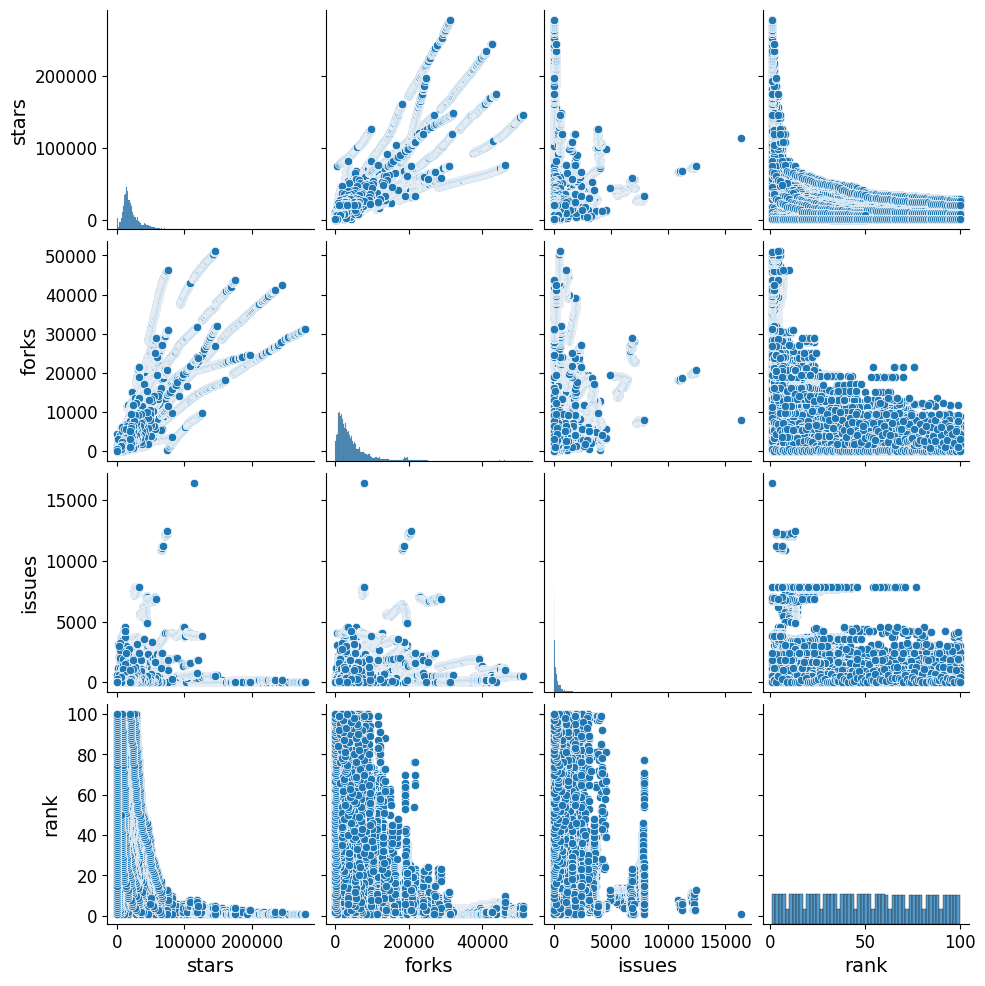

In [23]:
sns.pairplot(df[numerical_col])

<Axes: >

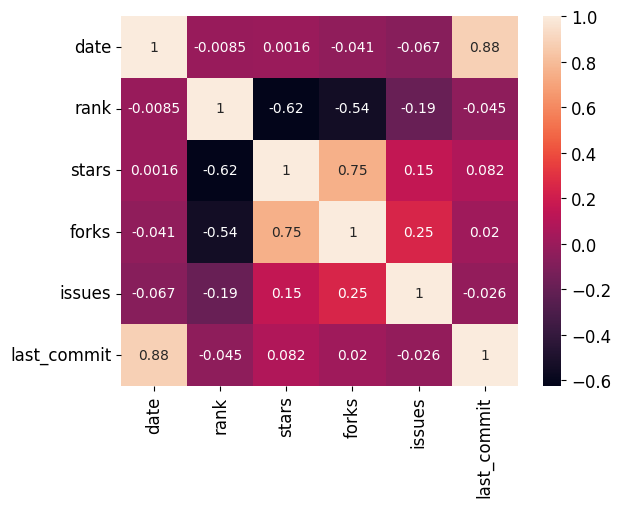

In [24]:
sns.heatmap(df[['date', 'rank', 'stars', 'forks', 'issues',
       'last_commit']].corr(), annot=True)

El an치lisis bivariante so se va a relizar con las columnas que presentan una gran correlaci칩n con la target mientras que el resto se a침adir치n al an치lisis multivariante.

- Destacamos la correlaci칩n de *forks* con *stars* y con *top*/*rank*.
- Tambi칠n cabe destacar la correlaci칩n entre s칤 de las variables previamente mentadas por su correlaci칩n con la target.
- Otra correlaci칩n que llama la atenci칩n es entre las variables *date* y *last_commit*. Es posible colinealidad.

Adem치s, vamos a crear dos columnas nuevas moment치neamente para facilitar el proceso de graficado. Una que agrupar치 las filas de 20 en 20 seg칰n ranking y otra que agrupar치 las filas por el a침o de entrada. 

In [25]:
# agrupaci칩n rank -> top
df_1 = df.copy()

df_1["top"] = range(len(df_1))

#top20
df_1["top"].loc[list(df_1[df_1["rank"] <= 20].index)] = 20

#top40
top_20_mas = list(df_1[df_1["rank"] > 20].index)
top_40_menos = list(df_1[df_1["rank"] < 41].index)
top_20_40 = [x for x in top_20_mas if x in top_40_menos]
df_1["top"].loc[top_20_40] = 40

#top60
top_40_mas = list(df_1[df_1["rank"] > 40].index)
top_60_menos = list(df_1[df_1["rank"] < 61].index)
top_40_60 = [x for x in top_40_mas if x in top_60_menos]
df_1["top"].loc[top_40_60] = 60

#top80
top_60_mas = list(df_1[df_1["rank"] > 60].index)
top_80_menos = list(df_1[df_1["rank"] < 81].index)
top_60_80 = [x for x in top_60_mas if x in top_80_menos]
df_1["top"].loc[top_60_80] = 80


#top100
top_100 = list(df_1[df_1["rank"] > 80].index)
df_1["top"].loc[top_100] = 100

df_1["top"].value_counts()

top
20     34440
40     34440
60     34440
80     33480
100    33480
Name: count, dtype: int64

In [26]:
#agrupaci칩n a침os date
df_1["year"] = df_1["date"].dt.year
df_1["year"].value_counts()

year
2023    36120
2020    35500
2022    34360
2019    32900
2021    26800
2024     3300
2018     1300
Name: count, dtype: int64

In [27]:
## agrupando por a침os last commit
df_1["lc_year"] = df_1["last_commit"].dt.year
df_1["lc_year"].value_counts()

lc_year
2020    36193
2022    35929
2019    33705
2023    29673
2021    28106
2018     3173
2024     1555
2017     1449
2016      301
2015      108
2014       42
2013       30
2012       14
2011        1
2009        1
Name: count, dtype: int64

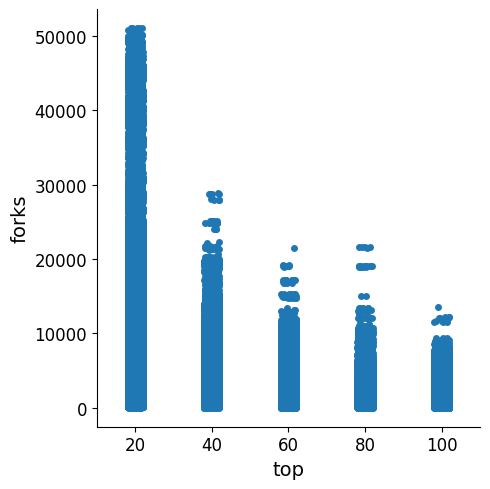

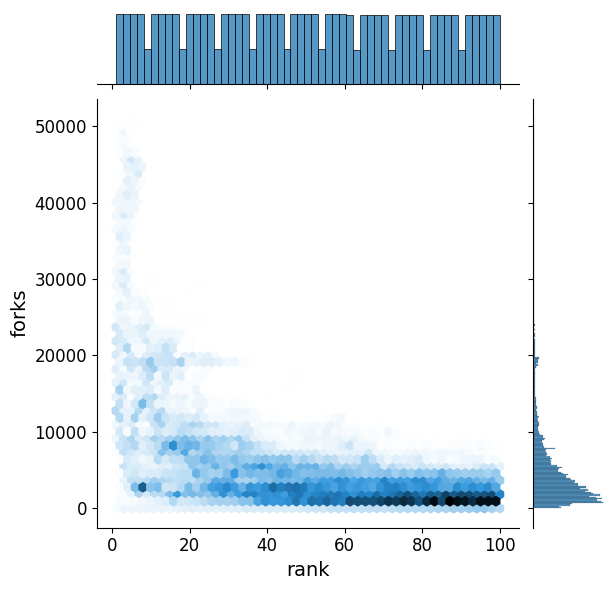

In [28]:
# forks y top/rank
sns.catplot(df_1, y= "forks", x ="top")
sns.jointplot(df_1, y= "forks", x ="rank", kind="hex")

<Axes: xlabel='stars', ylabel='forks'>

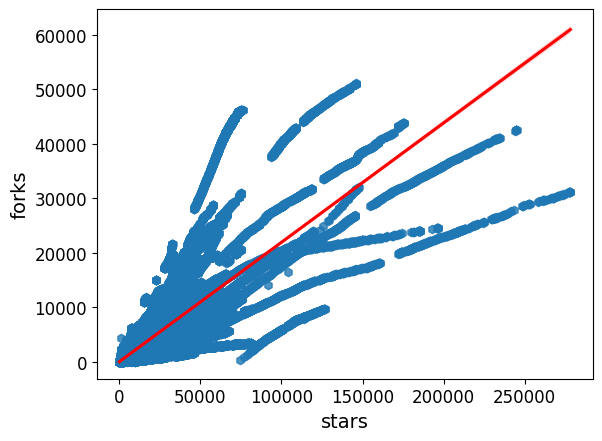

In [29]:
#stars y forks

sns.regplot(df_1, x="stars", y="forks", line_kws=dict(color="r"), marker="h")

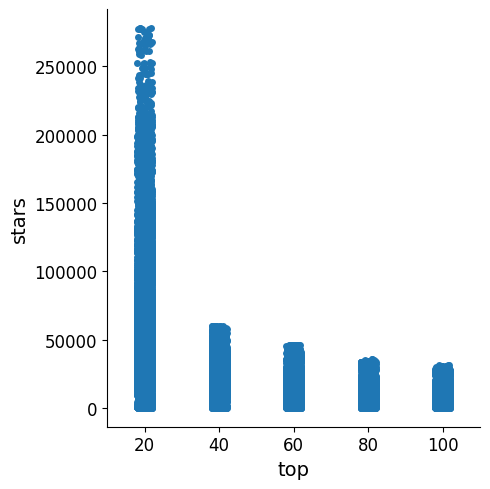

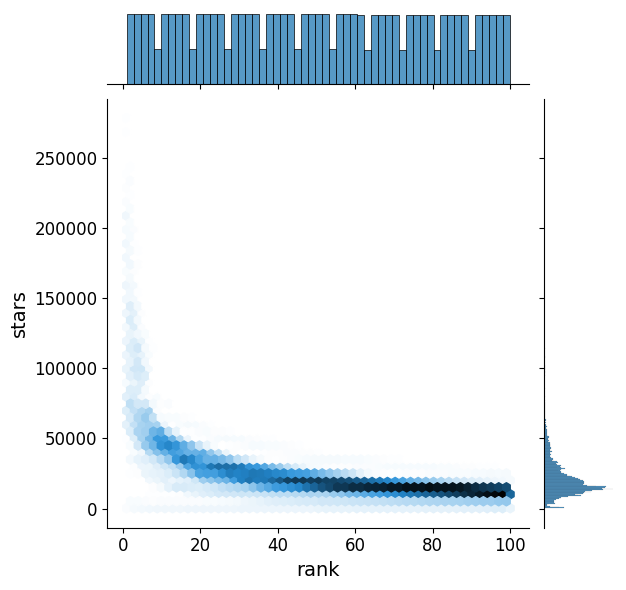

In [30]:
#stars y top/rank

sns.catplot(df_1, y= "stars", x ="top")
sns.jointplot(df_1, y= "stars", x ="rank", kind="hex")

### An치lisis Multivariante

<Axes: xlabel='stars', ylabel='forks'>

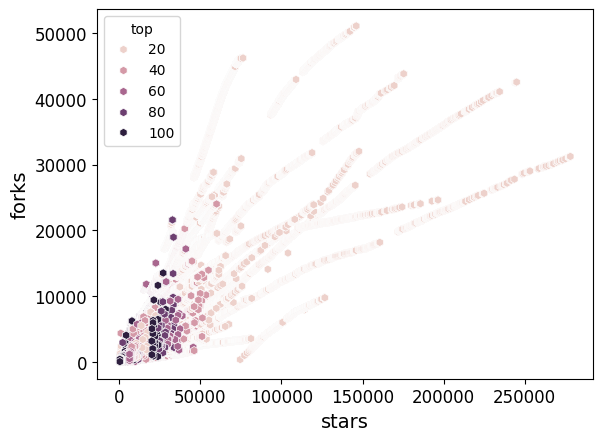

In [31]:
#stars-forks-top

sns.scatterplot(df_1, x="stars", y="forks", marker="h", hue="top")

<Axes: xlabel='year', ylabel='forks'>

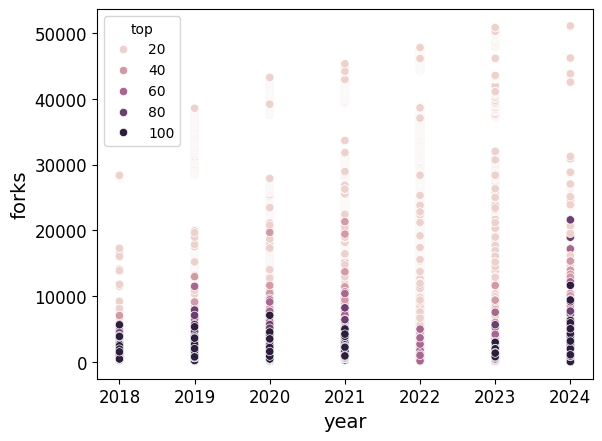

In [32]:
#stars - forks - top
sns.scatterplot(df_1, x="year", y="forks", hue="top")

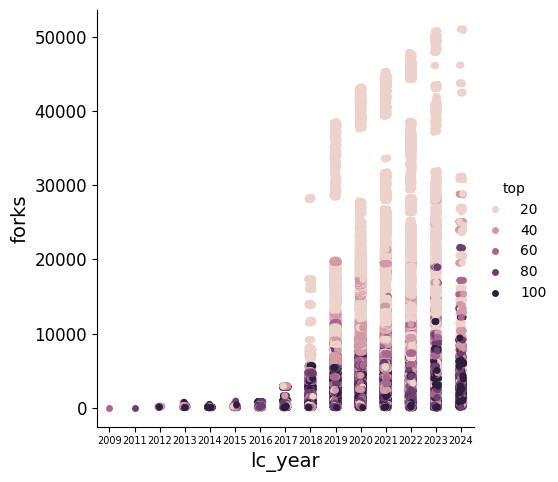

In [33]:
# last_commit, forks, top
sns.catplot(df_1, x="lc_year", y="forks", hue="top")
plt.xticks(size = 7);

Conclusiones del an치lisis multivariante:
- Cuantas m치s alto en el ranking y m치s estrellas tenga un repositorio, m치s forks se hacen del mismo.
- Pese a que no haya una fuerte correlaci칩n, se puede observar cierta tendencia en la cual tanto en la fecha de adici칩n de la entrada al dataset, como el 칰ltimo commit a dicho repositorio influyen en el ranking y por lo tanto en la cantidad de forks realizados.

### Conclusiones generales tras la primera exploraci칩n y el EDA

El dataset est치 bastante limpio y excepto las columnas categ칩ricas, el resto no necesitan demasiado preprocesamiento.

Las variables num칠ricas a priori mas importantes, con mas correlaci칩n con nuestra variable target (*forks*), son *stars* y *rank*. Tiene sentido pues cuanto mejor valorado est칠, y m치s popular sea el repositorio, m치s forks deber칤a tener.

Por 칰ltimo, pese a la poca correlaci칩n que existe entre las variables *last_commit* y *date* con el target, se observa un patr칩n en ambas variables que indica que cuanto mas cerca del presente este la fecha de subida de la entrada y el 칰ltimo commit, tiende a tener mas forks. Adem치s se puede intuir cierta colinealidad entre las dos variables.

Sobre las variables categ칩ricas, una vez sean tratadas podremos analizarlas.

## 2. Limpieza

### Valores nulos

Como vimos en la exploraci칩n incial, el 칰nico feature con valores nulos es *description*. Al ser menos de un 1% de los datos y adem치s una variable imposible de imputar, procedemos a eliminar estos valores nulos.

In [34]:
df.dropna(axis=0, inplace=True)

In [35]:
df.shape

(168687, 9)

### Valores At칤picos y outliers

Tras lo visto en el EDA, no existen valores at칤picos (imposibles o incoherentes). En cuanto a los outliers, se siente que estos valores aportan mas informaci칩n 칰til que ruido, por lo tanto se van a mantener. 

## 3. Feature Engineering

### days since last commit

En este apartado, vamos a crear un nuevo feature *days since last commit (days_since_lc)*. Ya que en el EDA observamos que pese a la poca correlaci칩n entre la variable *last_commit* y la target, se observaba cierta tendencia ascendente entre la cantida de forks y la proximidad con el presente del 칰ltimo commit. Con este nuevo feature, pretedemos mantener esa informaci칩n mientras se evita la posible colinealidad que existe entre las variables *last_commmit* y *date*.

In [36]:
# Ajustando el formato de last commit a date 
lc_y_m_d = [x[0] for x in df["last_commit"].astype(str).str.split(" ")]
df["last_commit"] = lc_y_m_d
df["last_commit"] = pd.to_datetime(df["last_commit"])

# Creando el feature nuevo
df["days_since_lc"] = (df["date"] - df["last_commit"]) / timedelta(days=1)
df.head() 

date  rank             repo_name  stars  forks     username  issues  \
0 2018-12-18     1        awesome-python  58777  11448        vinta     439   
1 2018-12-18     2  system-design-primer  53575   7570  donnemartin      68   
2 2018-12-18     3                models  46039  28053   tensorflow    1324   
3 2018-12-18     4           public-apis  45373   4707    toddmotto       5   
4 2018-12-18     5            youtube-dl  44956   7820          rg3    2566   

  last_commit                                        description  \
0  2018-12-13  A curated list of awesome Python frameworks, l...   
1  2018-12-18  Learn how to design large-scale systems. Prep ...   
2  2018-12-18          Models and examples built with TensorFlow   
3  2018-12-18  A collective list of free APIs for use in soft...   
4  2018-12-18  Command-line program to download videos from Y...   

   days_since_lc  
0            5.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0

Ahora procederemos a realizar un peque침o an치lisis exploratorio de esta columna nueva.

<Axes: >

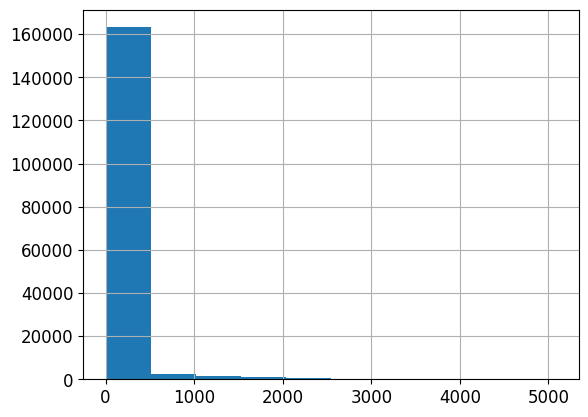

In [37]:
df["days_since_lc"].hist()

<Axes: xlabel='days_since_lc', ylabel='forks'>

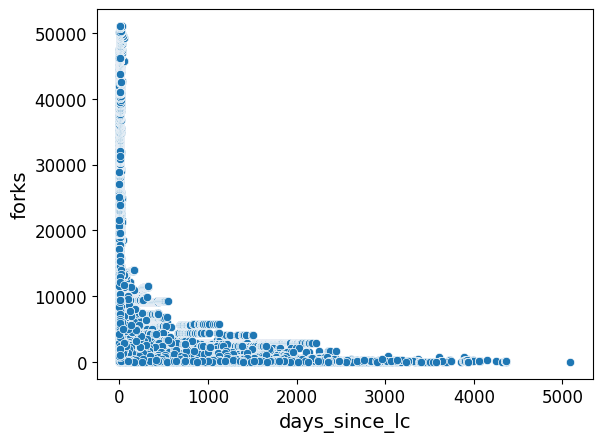

In [38]:
sns.scatterplot(df, x ="days_since_lc", y="forks")

<Axes: >

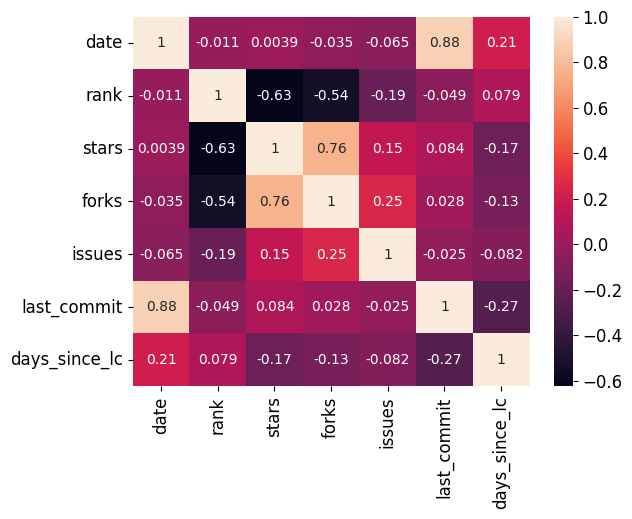

In [39]:
sns.heatmap(df.select_dtypes(exclude='O').corr(), annot=True)

Se puede observar en las gr치ficas que *days_since_lc* tiene un comportamiento y similar a *last_commit* y ademas hemos eliminado la posible colinealidad con la variable *date*. Por lo tanto vamos a eliminar el feature *last_commit*. 

In [40]:
df.drop(columns="last_commit", inplace=True)

### repos_by_user

La columna *username* es una variable categ칩rica, con informaci칩n sobre el autor del repositorio. Como vimos en la exploraci칩n inicial, no coincide el n칰mero de users con el la cantidad de repositorios 칰nicos, por lo tanto tiene que haber autores con mas de un repostorio. El trabajo de feature engineering que vamos a hacer con esta variable es crear una columna la cual nos indique si es un repostorio de un autor "famoso".

In [41]:
# Comprobando que haya usuarios con m치s de un repositorio
df.groupby("username")["repo_name"].value_counts()

username   repo_name                   
0k         shyaml                             1
0rpc       zerorpc-python                     1
0voice     interview_internal_reference     988
0x5e       wechat-deleted-friends             2
0xAX       linux-insides                   1134
                                           ... 
zulip      zulip                            615
zyantific  IDASkins                           1
zygmuntz   hyperband                          1
           phraug                             1
zzw922cn   Automatic_Speech_Recognition       1
Name: count, Length: 4265, dtype: int64

In [42]:
#usuarios con m치s de un repo
popular_users = list(df["username"].value_counts()[df["username"].value_counts() > 1].index)

#usuarios por repositorio
n_repos = [df[df["username"] == x]["repo_name"].nunique() for x in popular_users]

# Creando la columna repos_by_user
df = pd.merge(df, pd.DataFrame({'username':popular_users, 'repos_by_user':n_repos}), 'outer', on='username')

# rellenando lo NaNs que quedar치, que son para los usuarios con solo un repositorio
df["repos_by_user"].fillna(1, inplace=True)

<Axes: >

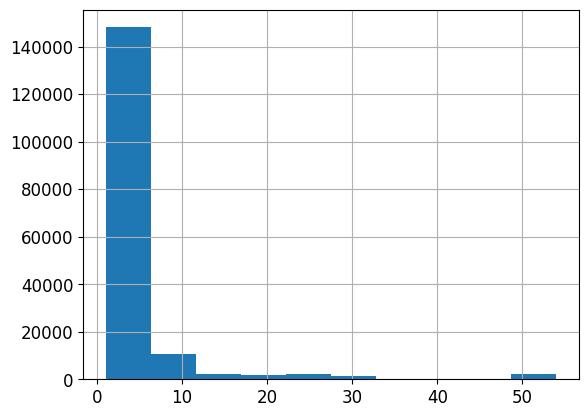

In [43]:
df["repos_by_user"].hist()

<Axes: xlabel='repos_by_user', ylabel='forks'>

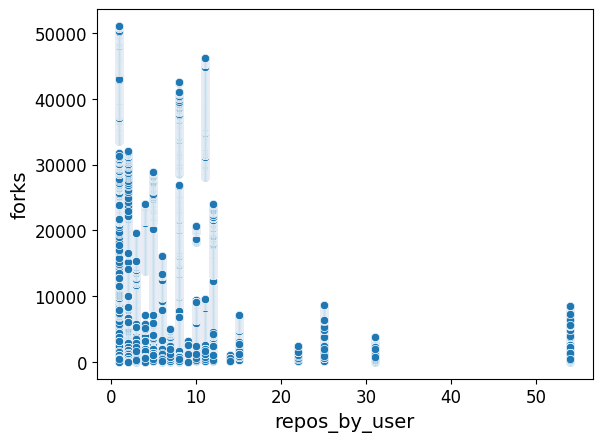

In [44]:
sns.scatterplot(df, x ="repos_by_user", y="forks")

Tras haber creado la columna *repos_by_user* y haber hecho un peque침o an치lisis exploratorio de la misma, se ve que existe cierta relaci칩n inversa entre el n칰mero de forks y los repositorios en el top del autor. A칰n as칤, sigue quedando la duda de si el propio nombre del autor influye.

## 4. Tranformaciones y escalado

### An치lisis de sentimiento

Para poder extraer mas informaci칩n de la descripci칩n, vamos a realizar la un an치lisi de sentimientos de la misma utilizando la libreria NLTK.

In [45]:
# Instanciando el an치lisis de sentimiento
sia = SentimentIntensityAnalyzer()

# Creando las columnas de an치lisis de sentimiento
res = {}

for i, x in df.iterrows():
    des = x["description"]
    repo_name = x["repo_name"]
    res[repo_name] = sia.polarity_scores(des)

vaders = pd.DataFrame(res).T

vaders.head()

neg    neu    pos  compound
awesome-python                  0.000  0.687  0.313    0.6249
system-design-primer            0.000  1.000  0.000    0.0000
interactive-coding-challenges   0.000  0.902  0.098    0.0772
data-science-ipython-notebooks  0.000  1.000  0.000    0.0000
awesome-aws                     0.085  0.709  0.206    0.5267

In [46]:
# a침adiendo vaders a nuestro DataFrame
vaders = vaders.reset_index().rename(columns={"index":"repo_name"})
df = df.merge(vaders, how="left")
df.head()

date  rank       repo_name  stars  forks username  issues  \
0 2018-12-18     1  awesome-python  58777  11448    vinta     439   
1 2018-12-19     1  awesome-python  58801  11454    vinta     439   
2 2018-12-20     1  awesome-python  58840  11455    vinta     439   
3 2018-12-21     1  awesome-python  58882  11465    vinta     440   
4 2018-12-22     1  awesome-python  58936  11470    vinta     439   

                                         description  days_since_lc  \
0  A curated list of awesome Python frameworks, l...            5.0   
1  A curated list of awesome Python frameworks, l...            6.0   
2  A curated list of awesome Python frameworks, l...            0.0   
3  A curated list of awesome Python frameworks, l...            1.0   
4  A curated list of awesome Python frameworks, l...            2.0   

   repos_by_user  neg    neu    pos  compound  
0            1.0  0.0  0.687  0.313    0.6249  
1            1.0  0.0  0.687  0.313    0.6249  
2            1.0  0.0  0.687  0.313    0.6249  
3            1.0  0.0  0.687  0.313    0.6249  
4            1.0  0.0  0.687  0.313    0.6249

Ahora vamos a realizar un peque침o an치lisis exploratorio de las columnas que hemos a침adido.

<Axes: xlabel='compound', ylabel='Count'>

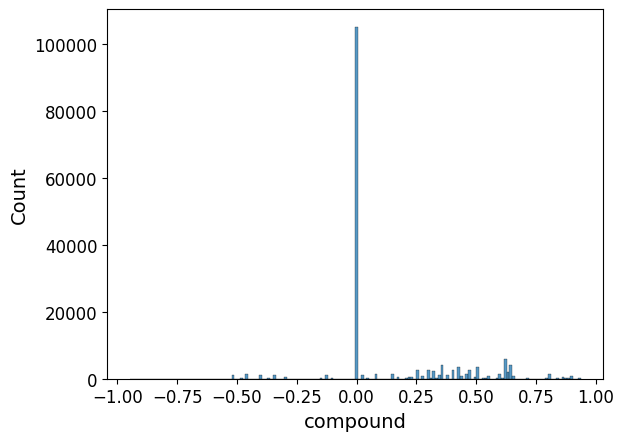

In [47]:
sns.histplot(df, x = "compound")

<Axes: xlabel='neu', ylabel='Count'>

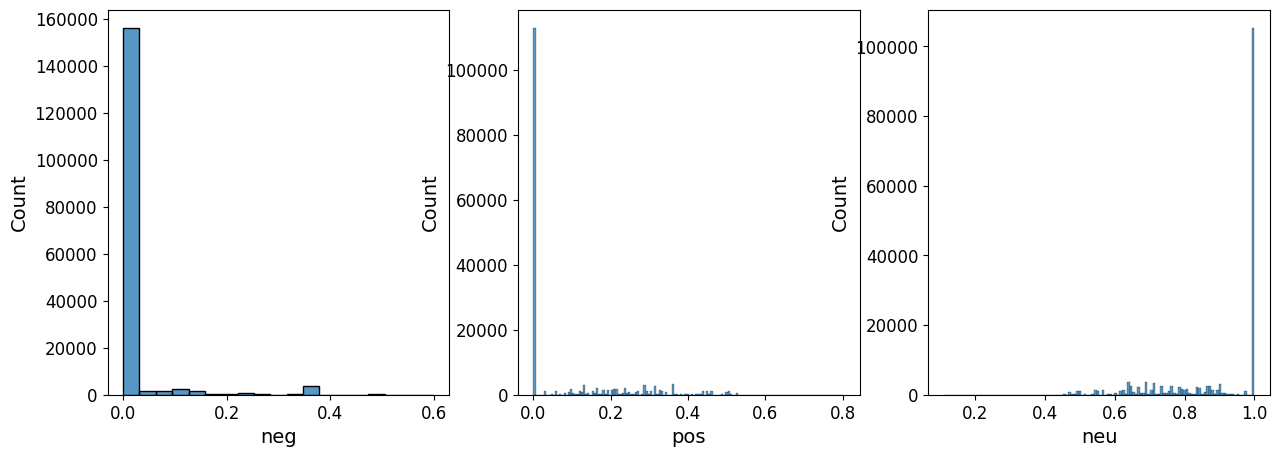

In [48]:
fig, axs = plt.subplots(1,3, figsize=(15, 5))

sns.histplot(df, x = "neg", ax=axs[0])
sns.histplot(df, x = "pos", ax=axs[1])
sns.histplot(df, x = "neu", ax=axs[2])

<Axes: >

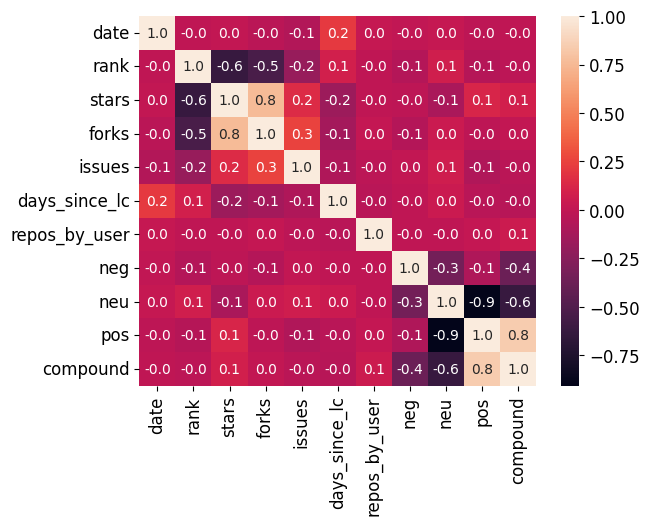

In [49]:
sns.heatmap(df.select_dtypes(exclude='O').corr(), annot=True, fmt=".1f")

Observamos que las columnas de sentimiento tienen mucha correlaci칩n entre ellas, por ello nos vamos a quedar solo con *compound* puesto que es una aglomeraci칩n de las 3. 

In [50]:
df.drop(columns=['neg', 'neu', 'pos'], inplace=True)

<Axes: xlabel='compound', ylabel='forks'>

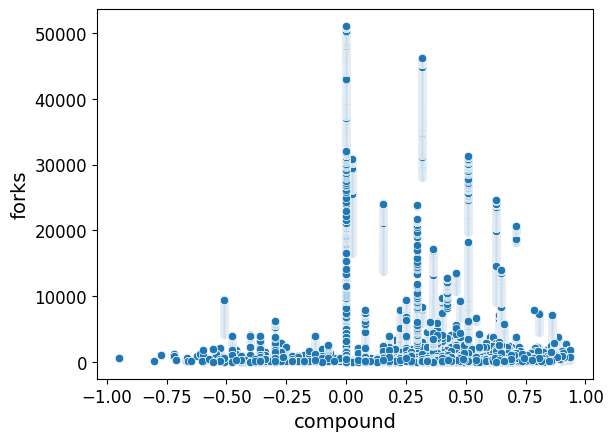

In [51]:
sns.scatterplot(df, x ="compound", y="forks")

### Label Encoder

Vamos a tranformar las dos columnas que quedan utilizando el m칠todo label encoder, puesto que crear dummies es inviable con la cantidad de 칰nicos que tienen.

In [52]:
le = LabelEncoder()

for x in df[["repo_name", "description", "username"]].columns:
    df[x] = le.fit_transform(df[x])

df.head()

date  rank  repo_name  stars  forks  username  issues  description  \
0 2018-12-18     1       1244  58777  11448      3209     439          412   
1 2018-12-19     1       1244  58801  11454      3209     439          412   
2 2018-12-20     1       1244  58840  11455      3209     439          412   
3 2018-12-21     1       1244  58882  11465      3209     440          412   
4 2018-12-22     1       1244  58936  11470      3209     439          412   

   days_since_lc  repos_by_user  compound  
0            5.0            1.0    0.6249  
1            6.0            1.0    0.6249  
2            0.0            1.0    0.6249  
3            1.0            1.0    0.6249  
4            2.0            1.0    0.6249

## Escalado

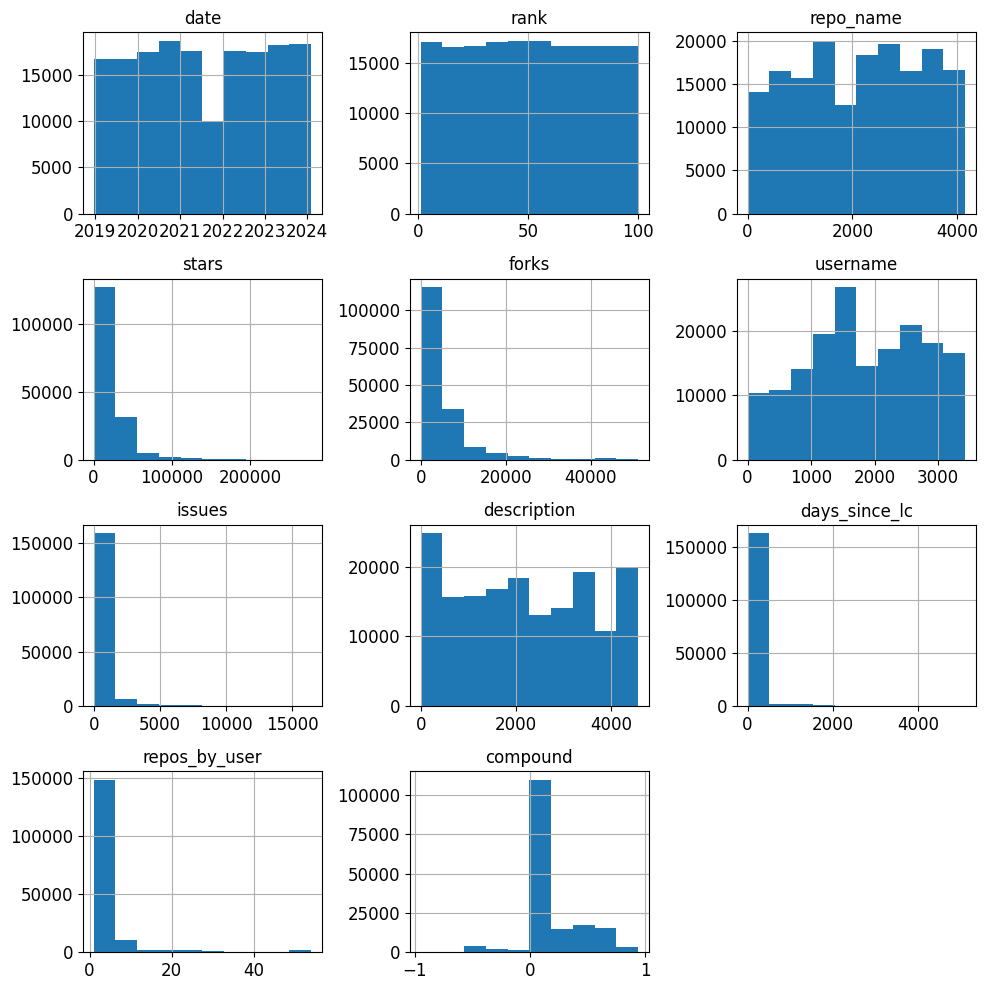

In [53]:
df.hist(figsize=(10,10))
plt.tight_layout()

Debido a las caracter칤sticas de los features (no se ajustan a la normal, son variables discretas y hay outliers), el escalado ser치 realizado mediante el m칠todo ``RobustScaler``.

In [54]:
# Prerando la columna Date para poder escalarla
df["day"] = df["date"].dt.day
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

df.drop(columns="date", inplace=True)

In [55]:
#Escalado
RobEsc = RobustScaler()

esc_features = RobEsc.fit_transform(df)

df[['rank', 'repo_name', 'stars', 'forks', 'username', 'issues',
       'description', 'days_since_lc', 'repos_by_user', 'compound', 'day',
       'month', 'year']] = esc_features

In [56]:
df

rank  repo_name     stars     forks  username    issues  \
0      -1.000000  -0.479267  2.787406  1.826290  0.987031  0.883721   
1      -1.000000  -0.479267  2.789049  1.827625  0.987031  0.883721   
2      -1.000000  -0.479267  2.791718  1.827847  0.987031  0.883721   
3      -1.000000  -0.479267  2.794593  1.830071  0.987031  0.886628   
4      -1.000000  -0.479267  2.798289  1.831183  0.987031  0.883721   
...          ...        ...       ...       ...       ...       ...   
168682 -0.346939  -0.023626  2.102943  1.042260 -0.124232 -0.334302   
168683 -0.306122  -0.023626  2.103628  1.043817 -0.124232 -0.334302   
168684 -0.244898  -0.023626  2.104517  1.043594 -0.124232 -0.331395   
168685 -0.244898  -0.023626  2.106023  1.044039 -0.124232 -0.331395   
168686 -0.387755  -0.023626  2.106845  1.044706 -0.124232 -0.331395   

        description  days_since_lc  repos_by_user  compound       day  \
0         -0.718153       0.111111            0.0  1.963859  0.133333   
1         -0.718153       0.166667            0.0  1.963859  0.200000   
2         -0.718153      -0.166667            0.0  1.963859  0.266667   
3         -0.718153      -0.111111            0.0  1.963859  0.333333   
4         -0.718153      -0.055556            0.0  1.963859  0.400000   
...             ...            ...            ...       ...       ...   
168682     0.410430      -0.055556            0.0  0.242615  0.933333   
168683     0.410430      -0.111111            0.0  0.242615  1.000000   
168684     0.410430      -0.111111            0.0  0.242615 -1.000000   
168685     0.410430      -0.111111            0.0  0.242615 -0.933333   
168686     0.410430      -0.111111            0.0  0.242615 -0.866667   

           month  year  
0       1.000000  -1.5  
1       1.000000  -1.5  
2       1.000000  -1.5  
3       1.000000  -1.5  
4       1.000000  -1.5  
...          ...   ...  
168682 -0.833333   1.5  
168683 -0.833333   1.5  
168684 -0.666667   1.5  
168685 -0.666667   1.5  
168686 -0.666667   1.5  

[168687 rows x 13 columns]

## 5. Clusterizaci칩n

Vamos a utilizar un modelo no supervidado como preprocesamiento para poder ajustar mejor las predicciones. En este caso nos hemos decantado por el ``kmeans-minibatch`` ya que nos facilitar치 el proceso de computaci칩n.

In [57]:
# quitamos la target

df_cluster = df.drop(columns="forks") 

# Buscando el K 칩ptimo
kmeans_per_k = [MiniBatchKMeans(n_clusters=k, random_state=42).fit(df_cluster)
                for k in range(2, 21)]
inertias = [model.inertia_ for model in kmeans_per_k]

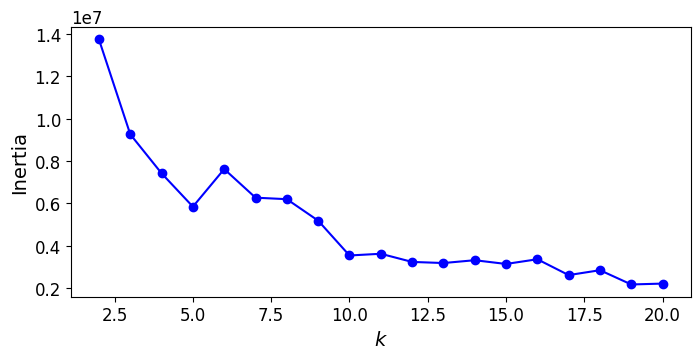

In [58]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 21), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)


plt.show()

El kmeans 칩ptimo es k=5.

In [59]:
# Instanciamos el modelo
kmeans = MiniBatchKMeans(5, random_state=42).fit(df_cluster)

In [60]:
# A침adimos los cluster al df
clusterized = kmeans.predict(df_cluster)
df_cluster["forks"] = df["forks"]
df_cluster["cluster_result"] = clusterized

df_cluster.head()

rank  repo_name     stars  username    issues  description  days_since_lc  \
0  -1.0  -0.479267  2.787406  0.987031  0.883721    -0.718153       0.111111   
1  -1.0  -0.479267  2.789049  0.987031  0.883721    -0.718153       0.166667   
2  -1.0  -0.479267  2.791718  0.987031  0.883721    -0.718153      -0.166667   
3  -1.0  -0.479267  2.794593  0.987031  0.886628    -0.718153      -0.111111   
4  -1.0  -0.479267  2.798289  0.987031  0.883721    -0.718153      -0.055556   

   repos_by_user  compound       day  month  year     forks  cluster_result  
0            0.0  1.963859  0.133333    1.0  -1.5  1.826290               0  
1            0.0  1.963859  0.200000    1.0  -1.5  1.827625               0  
2            0.0  1.963859  0.266667    1.0  -1.5  1.827847               0  
3            0.0  1.963859  0.333333    1.0  -1.5  1.830071               0  
4            0.0  1.963859  0.400000    1.0  -1.5  1.831183               0

In [61]:
# Separamos por cluster para hacer un modelo por cada uno
df_cluster_0 = df_cluster[df_cluster["cluster_result"] == 0]
df_cluster_1 = df_cluster[df_cluster["cluster_result"] == 1]
df_cluster_2 = df_cluster[df_cluster["cluster_result"] == 2]
df_cluster_3 = df_cluster[df_cluster["cluster_result"] == 3]
df_cluster_4 = df_cluster[df_cluster["cluster_result"] == 4]

## 6. Modelo Cluster 0

### Separaci칩n de los datos

In [62]:
# Separaci칩n en train y test
train_0, test_0 = train_test_split(df_cluster_0, test_size=0.2, random_state=42)

# Separaci칩n en train y val
X = train_0.drop(columns="forks")
y = train_0["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [63]:
# modelos
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m칠tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.618160
ElasticNet            0.485219
Ridge                 0.618160
Lasso                 0.380169
DecisionTree          0.998987
RandomForest          0.999518
AdaBoost              0.782057
GradientBoost         0.949263
HistGradientBoosting  0.993417

Los modelos con mejor score son el 치rbol de decisi칩n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [64]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.9993903052692981
hgb = 0.993954161032449
rf = 0.9996952811999235


Elegimos el 치rbol de decisi칩n puesto que su score es similar a los otros dos y es el m치s f치cil de explicar.

### Optimizaci칩n y entrenamiento

In [65]:
# par치metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 6, 'min_samples_leaf': 2, 'splitter': 'best'}


### M칠tricas y validaci칩n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci칩n.

In [66]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.8608552876776138
val r2: 0.8608552876776138
MAE: 0.4120550615952872
MSE: 0.31474018733449544
MAPE: 103159824787.63687


El modelo se ajusta correctamente a los datos de validaci칩n.

### Test

In [67]:
# Separando en x_test e y_test
X_test = test_0.drop(columns="forks")
y_test = test_0["forks"]

In [68]:
# M칠tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.8566366661122998
MAE: 0.4109087380553188
MSE: 0.3128430939227895
MAPE: 225322502031.04443


In [69]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.857276401728081
val 0.8608552876776138
test 0.8566366661122998


El modelo no pierde eficacia tras pasarle los datos de test, por lo tanto es un modelo listo para usarse.

## 7. Modelo Cluster 1

### Separaci칩n de datos

In [70]:
# Separaci칩n en train y test
train_1, test_1 = train_test_split(df_cluster_1, test_size=0.2, random_state=42)

# Separaci칩n en train y val
X = train_1.drop(columns="forks")
y = train_1["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [71]:
# modelos
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m칠tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.918200
ElasticNet            0.113520
Ridge                 0.917961
Lasso                 0.094116
DecisionTree          0.977041
RandomForest          0.986509
AdaBoost              0.969198
GradientBoost         0.983045
HistGradientBoosting  0.984005

Los modelos con mejor score son el 치rbol de decisi칩n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [72]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.9885269334345814
hgb = 0.9899179292148735
rf = 0.9913473668921693


Elegimos el 치rbol de decisi칩n puesto que su score es similar a los otros dos y es el m치s f치cil de explicar.

### Optimizaci칩n y entrenamiento

In [73]:
# par치metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 2, 'splitter': 'best'}


### M칠tricas y validaci칩n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci칩n.

In [74]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.9810903634520369
val r2: 0.9810903634520369
MAE: 0.01694001315753001
MSE: 0.0007556309755852279
MAPE: 0.027537346933649245


El modelo se ajusta correctamente a los datos de validaci칩n.

### Test

In [75]:
# Separando en x_test e y_test
X_test = test_1.drop(columns="forks")
y_test = test_1["forks"]

In [76]:
# M칠tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.9723287786686088
MAE: 0.019622485596156636
MSE: 0.0012679356800063804
MAPE: 0.03330932521975211


In [77]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.9811500046214368
val 0.9810903634520369
test 0.9723287786686088


## 8. Modelo Cluster 2

### Separaci칩n de datos

In [78]:
# Separaci칩n en train y test
train_2, test_2 = train_test_split(df_cluster_2, test_size=0.2, random_state=42)

# Separaci칩n en train y val
X = train_2.drop(columns="forks")
y = train_2["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [79]:
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m칠tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.704566
ElasticNet           -0.003179
Ridge                 0.704595
Lasso                -0.003377
DecisionTree          0.971188
RandomForest          0.980643
AdaBoost              0.927554
GradientBoost         0.965415
HistGradientBoosting  0.975582

Los modelos con mejor score son el 치rbol de decisi칩n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [80]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.9877723403700533
hgb = 0.9885199849314386
rf = 0.98931677099895


Elegimos el 치rbol de decisi칩n puesto que su score es similar a los otros dos y es el m치s f치cil de explicar.

### Optimizaci칩n y entrenamiento

In [81]:
# par치metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 11, 'min_samples_leaf': 2, 'splitter': 'best'}


### M칠tricas y validaci칩n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci칩n.

In [82]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.9447337091699971
val r2: 0.9447337091699971
MAE: 0.0373379331343185
MSE: 0.004444864908829714
MAPE: 0.2875670661949268


El modelo se ajusta corectamente a los datos de validaci칩n.

### Test

In [83]:
# Separando en x_test e y_test
X_test = test_2.drop(columns="forks")
y_test = test_2["forks"]

In [84]:
# M칠tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.9387576279185617
MAE: 0.03789243161145123
MSE: 0.005300119303773913
MAPE: 1.3917270979227672


In [85]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.9398203302317444
val 0.9447337091699971
test 0.9387576279185617


## 9. Modelo Cluster 3

### Separaci칩n de datos

In [86]:
# Separaci칩n en train y test
train_3, test_3 = train_test_split(df_cluster_2, test_size=0.2, random_state=42)

# Separaci칩n en train y val
X = train_3.drop(columns="forks")
y = train_3["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [87]:
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m칠tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.704566
ElasticNet           -0.003179
Ridge                 0.704595
Lasso                -0.003377
DecisionTree          0.969574
RandomForest          0.981310
AdaBoost              0.909063
GradientBoost         0.966039
HistGradientBoosting  0.975582

Los modelos con mejor score son el 치rbol de decisi칩n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [88]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.9877723403700533
hgb = 0.9885199849314386
rf = 0.98931677099895


Elegimos el 치rbol de decisi칩n puesto que su score es similar a los otros dos y es el m치s f치cil de explicar.

### Optimizaci칩n y entrenamiento

In [89]:
# par치metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 11, 'min_samples_leaf': 2, 'splitter': 'best'}


### M칠tricas y validaci칩n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci칩n.

In [90]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.9447337091699971
val r2: 0.9447337091699971
MAE: 0.0373379331343185
MSE: 0.004444864908829714
MAPE: 0.2875670661949268


El modelo se ajusta correctamente a los datos de validaci칩n.

### Test

In [91]:
# Separando en x_test e y_test
X_test = test_3.drop(columns="forks")
y_test = test_3["forks"]

In [92]:
# M칠tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.9387576279185617
MAE: 0.03789243161145123
MSE: 0.005300119303773913
MAPE: 1.3917270979227672


In [93]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.9398203302317444
val 0.9447337091699971
test 0.9387576279185617


## 10. Modelo Cluster 4

### Separaci칩n de los datos

In [94]:
# Separaci칩n en train y test
train_4, test_4 = train_test_split(df_cluster_3, test_size=0.2, random_state=42)

# Separaci칩n en train y val
X = train_4.drop(columns="forks")
y = train_4["forks"]

X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.2, random_state=42)

### BaseLines

In [95]:
modelos = {
    "LinearRegression": LinearRegression(),
    "ElasticNet": ElasticNet(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoost": GradientBoostingRegressor(),
    "HistGradientBoosting": HistGradientBoostingRegressor()
}

# Define las m칠tricas a usar
metricas = "r2"

resultados_dict = {}

for modelo in modelos:

    resultados_dict[modelo] = [cross_val_score(modelos[modelo], X_train, y_train, scoring="r2", cv=3).mean()]

#resultado
pd.DataFrame(resultados_dict).T.rename(columns={0:"Score"})

Score
LinearRegression      0.835009
ElasticNet            0.094936
Ridge                 0.835010
Lasso                 0.026274
DecisionTree          0.998681
RandomForest          0.999052
AdaBoost              0.915901
GradientBoost         0.994482
HistGradientBoosting  0.998413

Los modelos con mejor score son el 치rbol de decisi칩n, random forest y HGB. Vamos a decidir entre los tres mediante un ``Voting``.

In [96]:
# Instanciando el voting
VotingR = VotingRegressor(estimators=
                          [
                              ("dt", DecisionTreeRegressor(random_state=42)),
                              ("hgb", HistGradientBoostingRegressor(random_state=42)),
                              ("rf", RandomForestRegressor(random_state=42))
                          ])
# Entrenando el voting
VotingR.fit(X_train, y_train)

#monstrando resultados
for name, clf in VotingR.named_estimators_.items():
    print(name, "=", clf.score(X_val, y_val))

dt = 0.999060037943284
hgb = 0.997573826788119
rf = 0.9993798468015911


Elegimos el 치rbol de decisi칩n puesto que su score es similar a los otros dos y es el m치s f치cil de explicar.

### Optimizaci칩n y entrenamiento

In [97]:
# par치metros a evaluar
param_grid = {
    'max_depth': [0, 1, 2, 3, 4, 5],
    'min_samples_leaf': np.arange(1,10),
    'max_features': np.arange(2,12),
    'splitter':["best", "random"], 
    'min_samples_leaf': np.arange(2,5)
    

}

# modelo
decicsion_tree_r = DecisionTreeRegressor(random_state=42)

# gridsearch
grid_search = GridSearchCV(decicsion_tree_r,
                           param_grid,
                           cv=5,
                           scoring='neg_root_mean_squared_error',
                           n_jobs=-1
                          )

# Entrenamiento
grid_search.fit(X_train, y_train)

# instanciando modelo entrenado en una variable
dtr = grid_search.best_estimator_

# mostrando mejores valores

print(grid_search.best_params_)

{'max_depth': 5, 'max_features': 11, 'min_samples_leaf': 2, 'splitter': 'best'}


### M칠tricas y validaci칩n

Vamos a realizar una prediccion para ver como se ajusta el modelo a los valores de validaci칩n.

In [98]:
pred = dtr.predict(X_val)

print("train r2:", r2_score(y_val, pred))
print('val r2:', r2_score(y_val, pred))
print("MAE:", mean_absolute_error(y_val, pred))
print("MSE:", mean_squared_error(y_val, pred))
print("MAPE:", mean_absolute_percentage_error(y_val, pred))

train r2: 0.9559623188243667
val r2: 0.9559623188243667
MAE: 0.0702605929191801
MSE: 0.010496039243755377
MAPE: 268175007199.44522


El modelo se ajusta correctamente a los datos de validaci칩n

### Test

In [99]:
# Separando en x_test e y_test
X_test = test_4.drop(columns="forks")
y_test = test_4["forks"]

In [100]:
# M칠tricas del test
pred_test = dtr.predict(X_test)
print("r2:", r2_score(y_test, pred_test))
print("MAE:", mean_absolute_error(y_test, pred_test))
print("MSE:", mean_squared_error(y_test, pred_test))
print("MAPE:", mean_absolute_percentage_error(y_test, pred_test))

r2: 0.9553646311180242
MAE: 0.07017223973443505
MSE: 0.010581163668619872
MAPE: 0.3295416776334235


In [101]:
# Viendo como se ajusta el modelo
print('train', r2_score(y_train, dtr.predict(X_train)))
print('val', r2_score(y_val, pred))
print('test', r2_score(y_test, pred_test))

train 0.9579293036165205
val 0.9559623188243667
test 0.9553646311180242
